# Project \#1 Starter Code:
Your first step is to decide which dataset you would like to work with for this project.

For this project, you will get to choose what dataset you use. The ones we've used in class (other than Iris/Titanic as they're pretty small) are all fair game (wine quality, breast cancer, spotify).

Here are some other possibilities--Kaggle has many many more. It might be a good idea to double check with me before grabbing a dataset that's not listed here:
- 🥑 [Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)
- 🎟️ [Admission to University](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university)
- 🏎️ [Speed Dating](https://www.kaggle.com/datasets/whenamancodes/speed-dating)
- 🎓 [World University Ranking](https://www.kaggle.com/datasets/whenamancodes/world-university-ranking-2022-2023)
- 📸 [Top Instagram Influencers](https://www.kaggle.com/datasets/whenamancodes/top-200-influencers-crushing-on-instagram)
- 🌦️ [Weather Prediction](https://www.kaggle.com/datasets/thedevastator/weather-prediction)
- 🤑 [Student Monthly Expenses](https://www.kaggle.com/datasets/shariful07/nice-work-thanks-for-share)
- 🍺 [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)
- 🏫 [College Score Card](https://www.kaggle.com/datasets/thedevastator/u-s-department-of-education-college-scorecard-da)
- 🎮 [IMDB Video Games](https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games)
- 🎵 [Spotify Recommendation](https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation)

# Self-Evaluation:

| **Description/Writing** | **I think I deserve** |
|-------------------------|-----------------------|
| 1: Problem              | /2                    |
| 2: Data Prep            | /2                    |
| 3: Research             | /10                   |
| 4: Analysis             | /10                   |
| 5: Bumps in the Road.   | /1                    |
| Total                   | /25                   |

# 1. Problem:
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

I am attempting to be able to predict the income group.  My data is from Kaggle, and it is "Life expectancy and Socio- Economic (World Bank)".  Here is the link: https://www.kaggle.com/datasets/mjshri23/life-expectancy-and-socio-economic-world-bank . The dataset is quite extensive, but I will only be using a portion of the columns.  There are a total of 16 columns and 3307 rows in the initial dataset,  but I plan to just use 11 of those, not including the target variable, which is Income Group. Below, you can see the columns I will be using are in green, as well as a description for each column in the dataset.  I will be using classification methods for the learning model as the income group variable is discrete in nature.


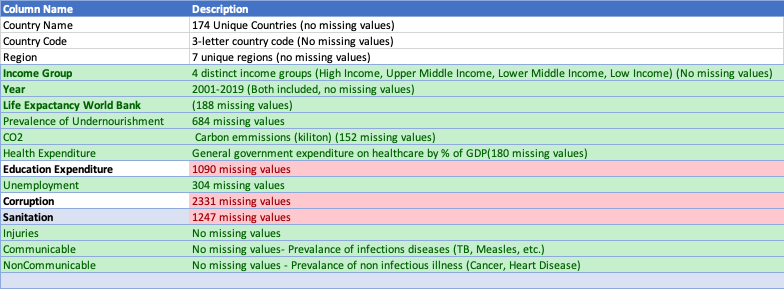


# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

As you can see in the table above, there are a couple of columns that I am using that need to be prepared for this experiment.  To start, I dropped a number of columns in which there was just too much missing data.  In order to do that, I used the drop fucntion in pandas.  Next, I decided to fill in the remaining na columns.  I was hesitant about what method to use here, but ultimately decided that filling them was the best.  I then has to decide how I wanted to fill those values.  In order to get the result that would skew the data the least, I looked at the distribution and mean of each of the columns in which there were na values.  I found that looking at that helped, as I could then see if the mean would be skewed due to that distribution. Here example of the distrubution from the data that I used to aid in my decision.  For CO2 Emissions: there is a mean of 157k, with 25% falling at 2k or below, 50% at 10.2k or below, and 75% falling at 58.8k.  In addition, the minimim was 10 and the maximum was 10.7m.  As you can see The mean falls well above the 75% mark, indicating to me that I may want to use the median instead, as an outlier may be skweing the mean.  After cleaning the data, I checked to see if there were still any missing values with the isna.any() funciton and saw that no data points were missing anymore, so the data was ready to use.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

path = '/content/drive/MyDrive/CS167/DATA/life-expectancy.csv'
data = pd.read_csv(path)
print('Data shape', data.shape)
data.head()



In [ ]:
clean_data = data.drop(columns = ['Country Code','Education Expenditure %', 'Corruption', 'Sanitation'])

clean_data.head()

In [ ]:
life_expectancy_mean = clean_data['Life Expectancy World Bank'].mean()
undernourishment_mean = clean_data['Prevelance of Undernourishment'].mean()
co2_mean = clean_data['CO2'].median()
healthexp_mean = clean_data['Health Expenditure %'].mean()
unemployment_mean = clean_data['Unemployment'].mean()

clean_data['Life Expectancy World Bank'].fillna(life_expectancy_mean, inplace=True)
clean_data['Prevelance of Undernourishment'].fillna(undernourishment_mean, inplace=True)
clean_data['CO2'].fillna(co2_mean, inplace=True)
clean_data['Health Expenditure %'].fillna(healthexp_mean, inplace=True)
clean_data['Unemployment'].fillna(unemployment_mean, inplace=True)

clean_data.head()




In [ ]:
clean_data.isna().any()

# 3. Research

Put your code and your experiments here.

For full credit, your experiments should include the following models:
- __k Nearest Neighbors__
- __weighted k Nearest Neighbors__
- __decision tree__
- __random forest__

You need to demonstrate the performance of these models on both __normalized__ and __non-normalized__ data.

For each of the above models, you need to include a __graph of at least 1 tuned parameter__.


In [5]:
# code goes here... don't forget to include graphs. I loves graphs.
from sklearn import tree
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

predictors = [ 'Year', 'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2', 'Health Expenditure %', 'Unemployment', 'Injuries', 'Communicable', 'NonCommunicable']
target = "IncomeGroup"
train_data, test_data, train_sln, test_sln = \
        train_test_split(clean_data[predictors], clean_data[target], test_size = 0.2, random_state=41)







Normalized Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_data) # computes the mean and std to be used for later scaling
train_data_normalized = scaler.transform(train_data) # performs standardization by centering and scaling on the training features
test_data_normalized = scaler.transform(test_data) # performs standardization by centering and scaling on the testing features
train_data_normalized

K Nearest Neighbors Non Normalized

In [ ]:
kNN = neighbors.KNeighborsClassifier(n_neighbors = 2)
kNN.fit(train_data, train_sln)
predictions = kNN.predict(test_data)
print(predictions)
print('Accuracy:', accuracy_score(test_sln,predictions))

In [ ]:


def tune_number_neighbors(n_estimator_values):
    kNN_accuracies = []

    for n in n_estimator_values:

        curr_kNN = neighbors.KNeighborsClassifier(n_neighbors=n)
        curr_kNN.fit(train_data,train_sln)
        curr_predictions = curr_kNN.predict(test_data)
        curr_accuracy = accuracy_score(test_sln,curr_predictions)
        kNN_accuracies.append(curr_accuracy)


    plt.suptitle('kNN Accuracy vs. number of neighbors',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,kNN_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.8,1])

    plt.show()

tune_number_neighbors(range(1,40))

KNN Normalized

In [ ]:
kNN = neighbors.KNeighborsClassifier(n_neighbors = 4)
kNN.fit(train_data_normalized, train_sln)
predictions = kNN.predict(test_data_normalized)
print(predictions)
print('Accuracy:', accuracy_score(test_sln,predictions))

In [ ]:


def tune_number_neighbors(n_estimator_values):
    kNN_accuracies = []

    for n in n_estimator_values:

        curr_kNN = neighbors.KNeighborsClassifier(n_neighbors=n)
        curr_kNN.fit(train_data_normalized,train_sln)
        curr_predictions = curr_kNN.predict(test_data_normalized)
        curr_accuracy = accuracy_score(test_sln,curr_predictions)
        kNN_accuracies.append(curr_accuracy)


    plt.suptitle('kNN Accuracy vs. number of neighbors',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,kNN_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.8,1])

    plt.show()

tune_number_neighbors(range(1,40))

Weighted KNN Non Normalized

In [ ]:
kNN = neighbors.KNeighborsClassifier(n_neighbors = 6 , weights = 'distance')
kNN.fit(train_data, train_sln)
predictions = kNN.predict(test_data)
print(predictions)
print('Accuracy:', accuracy_score(test_sln,predictions))

In [ ]:
import matplotlib.pyplot as plt

def tune_number_neighbors(n_estimator_values):
    kNN_accuracies = []

    for n in n_estimator_values:

        curr_kNN = neighbors.KNeighborsClassifier(n_neighbors=n, weights = 'distance')
        curr_kNN.fit(train_data,train_sln)
        curr_predictions = curr_kNN.predict(test_data)
        curr_accuracy = accuracy_score(test_sln,curr_predictions)
        kNN_accuracies.append(curr_accuracy)


    plt.suptitle('w-kNN Accuracy vs. number of neighbors',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,kNN_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.8,1])

    plt.show()

tune_number_neighbors(range(1,40))

Weighted KNN Normalized

In [ ]:
kNN = neighbors.KNeighborsClassifier(n_neighbors = 4, weights = 'distance')
kNN.fit(train_data_normalized, train_sln)
predictions = kNN.predict(test_data_normalized)
print(predictions)
print('Accuracy:', accuracy_score(test_sln,predictions))

In [ ]:


def tune_number_neighbors(n_estimator_values):
    kNN_accuracies = []

    for n in n_estimator_values:

        curr_kNN = neighbors.KNeighborsClassifier(n_neighbors=n, weights= 'distance')
        curr_kNN.fit(train_data_normalized,train_sln)
        curr_predictions = curr_kNN.predict(test_data_normalized)
        curr_accuracy = accuracy_score(test_sln,curr_predictions)
        kNN_accuracies.append(curr_accuracy)


    plt.suptitle('w-kNN Accuracy vs. number of neighbors',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,kNN_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.8,1])

    plt.show()

tune_number_neighbors(range(1,40))

Decision Tree Non Normalized

In [ ]:
dt = tree.DecisionTreeClassifier()

dt.fit(train_data, train_sln)

income_predictions = dt.predict(test_data)

print("Accuracy:", accuracy_score(test_sln,income_predictions))


print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(income_predictions[i],"\t\t", test_sln.iloc[i])

print("-------------------------------------------------------")

income_labels= ["High income", "Upper middle income","Lower middle income", 'Low income']
conf_mat = confusion_matrix(test_sln, income_predictions, labels=income_labels)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=income_labels)
displ.plot()
plt.show()

In [ ]:
def tune_max_depth(depth_values):
    dt_accuracies = []

    for n in depth_values:

        curr_dt = DecisionTreeClassifier(max_depth=n, random_state=41)
        curr_dt.fit(train_data,train_sln)
        curr_predictions = curr_dt.predict(test_data)
        curr_accuracy = accuracy_score(test_sln,curr_predictions)
        dt_accuracies.append(curr_accuracy)


    plt.suptitle('Decision Tree accuracy vs. Max Depth',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('accuracy')
    plt.plot(depth_values,dt_accuracies,'ro-')
    plt.axis([0,depth_values[-1]+1,.8,1])

    plt.show()

tune_max_depth(range(1,40))

 Decision Tree Normalized

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth = 13, random_state=41)

dt.fit(train_data_normalized, train_sln)

income_predictions = dt.predict(test_data_normalized)

print("Accuracy:", accuracy_score(test_sln,income_predictions))


print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(income_predictions[i],"\t\t", test_sln.iloc[i])

print("-------------------------------------------------------")

income_labels= ["High income", "Upper middle income","Lower middle income", 'Low income']
conf_mat = confusion_matrix(test_sln, income_predictions, labels=income_labels)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=income_labels)
displ.plot()
plt.show()

In [ ]:
def tune_max_depth(depth_values):
    dt_accuracies = []

    for n in depth_values:

        curr_dt = DecisionTreeClassifier(max_depth=n, random_state=41)
        curr_dt.fit(train_data_normalized,train_sln)
        curr_predictions = curr_dt.predict(test_data_normalized)
        curr_accuracy = accuracy_score(test_sln,curr_predictions)
        dt_accuracies.append(curr_accuracy)


    plt.suptitle('Decision Tree accuracy vs. Max Depth',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('accuracy')
    plt.plot(depth_values,dt_accuracies,'ro-')
    plt.axis([0,depth_values[-1]+1,.8,1])

    plt.show()

tune_max_depth(range(1,40))

Random Forest Non Normalized

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 0)
forest.fit(train_data,train_sln)
predictions = forest.predict(test_data)
print("accuracy score: ", accuracy_score(test_sln,predictions))

vals = data[target].unique() ## possible classification values (M = malignant; B = benign)
conf_mat = confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "True " + vals, columns = "Predicted " + vals))

In [ ]:
def tune_number_of_trees(n_estimator_values):
    rf_accuracies = []

    for n in n_estimator_values:

        curr_rf = RandomForestClassifier(n_estimators=n, random_state=41)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_accuracy = accuracy_score(test_sln,curr_predictions)
        rf_accuracies.append(curr_accuracy)


    plt.suptitle('Random Forest accuracy vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,rf_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.8,1])

    plt.show()

tune_number_of_trees(range(1,31))

Random Forest Normalized

In [ ]:

forest = RandomForestClassifier(random_state = 0)
forest.fit(train_data_normalized,train_sln)
predictions = forest.predict(test_data_normalized)
print("accuracy score: ", accuracy_score(test_sln,predictions))

vals = data[target].unique() ## possible classification values (M = malignant; B = benign)
conf_mat = confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "True " + vals, columns = "Predicted " + vals))

In [ ]:
import matplotlib.pyplot as plt

def tune_number_of_trees(n_estimator_values):
    rf_accuracies = []

    for n in n_estimator_values:

        curr_rf = RandomForestClassifier(n_estimators=n, random_state=41)
        curr_rf.fit(train_data_normalized,train_sln)
        curr_predictions = curr_rf.predict(test_data_normalized)
        curr_accuracy = accuracy_score(test_sln,curr_predictions)
        rf_accuracies.append(curr_accuracy)


    plt.suptitle('Random Forest accuracy vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,rf_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.8,1])

    plt.show()

tune_number_of_trees(range(1,31))

Best results at 25 trees, gets me to .998 accuracy score which is very good.

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

This chart might help organize your results:

| **Model**     | **Non-Normalized** | **Normalized** | **Parameter Tuned** |
|---------------|--------------------|----------------|---------------------|
| kNN           |      .959              |      .898          |          .968           |
| w-kNN         |       .968             |           .935     |           .969          |
| decision tree |         .971           |        .971        |                .974     |
| random forest |     .993               |            .995    |         .998            |

As you can see in the table above, all fo the methods of classification were bettered by parameter tuning.  Overall though, the highest accuracy came from the parameter-tuned random forest. One thing I found interesting was that in the kNN and w-kNN, the normalized results were worse than the non-normalized.  The normalized kNN performed the worst of all the models, and overall kNN performed the worst.  I think that this is partly due to the large size of the dataset.  Typically random forests work better on larger datasets.  This also showed me that parameter tuning is very important in getting the most accurate model, as all of the models were improved through parameter tuning.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

I am feeling unsure of the filling of the values in the dataset, but I felt like it was big enough for that to not cause too much skew. I pndered a lot of whether to use mean, median or mode for filling the data, thinking through what would cause the least skew in the data.  Ultimately, I decided that mean was best as it logically makes the most sense to me, especially with the size and extent of the dataset.